# Screen Time Analysis

In [47]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from datetime import datetime

In [48]:
df=pd.read_csv("Screentime - App Details.csv")

# EDA

In [49]:
df.head() #top 5 data

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


In [50]:
df.tail() #last 5 data

,Date,Usage,Notifications,Times opened,App
49,09/17/2022,212,212,120,Whatsapp
50,09/18/2022,244,303,132,Whatsapp
51,09/19/2022,77,169,105,Whatsapp
52,09/20/2022,58,190,78,Whatsapp
53,09/21/2022,89,262,68,Whatsapp


In [51]:
df.sample(5) #It brings random data

,Date,Usage,Notifications,Times opened,App
53,09/21/2022,89,262,68,Whatsapp
40,09/08/2022,69,217,82,Whatsapp
30,08/29/2022,59,157,74,Whatsapp
32,08/31/2022,108,169,77,Whatsapp
38,09/06/2022,91,205,110,Whatsapp


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [53]:
df.isnull().sum() #Specifies the empty column

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

In [54]:
df.columns


Index(['Date', 'Usage', 'Notifications', 'Times opened', 'App'], dtype='object')

In [55]:
df['Date'] = pd.to_datetime(df['Date'])
df.drop(['Date', 'App'], axis=1).corr()

,Usage,Notifications,Times opened
Usage,1.000000,0.774452,0.816409
Notifications,0.774452,1.000000,0.882983
Times opened,0.816409,0.882983,1.000000


<Axes: >

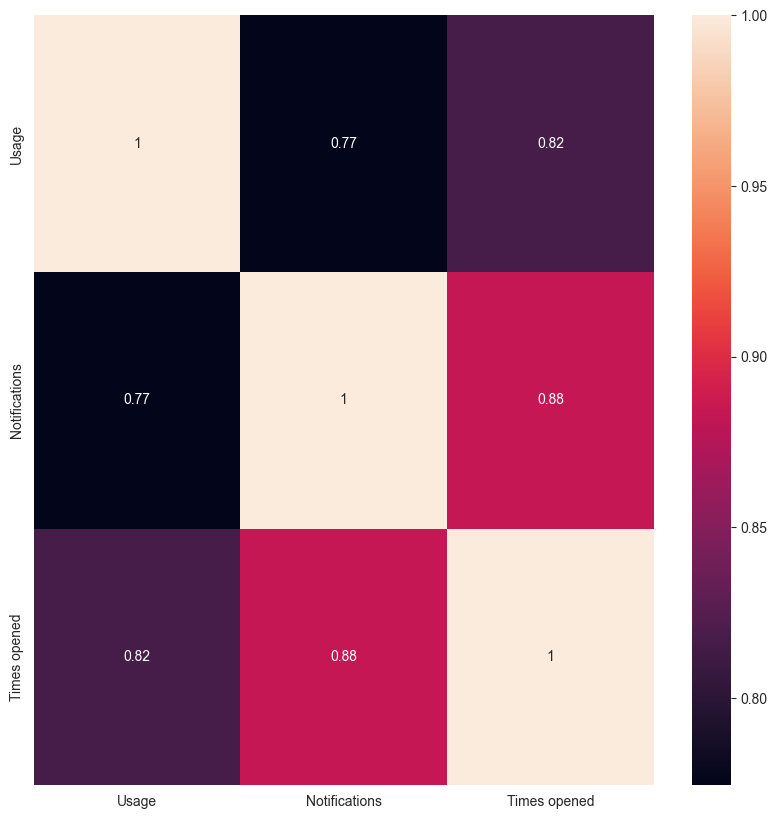

In [56]:
plt.figure(figsize=(10,10)) #chart size
sns.heatmap(df.drop(['Date', 'App'], axis=1).corr(),annot=True) #Corr graphic display

In [57]:
df["App"].value_counts()

App
Instagram    27
Whatsapp     27
Name: count, dtype: int64

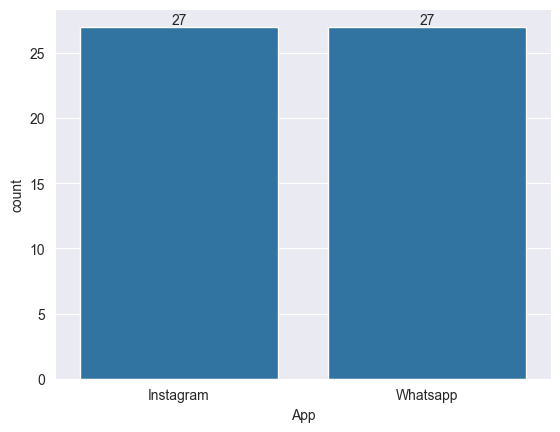

In [58]:
ax=sns.countplot(x=df["App"]) #
ax.bar_label(ax.containers[0]);

In [59]:
df.describe()

,Date,Usage,Notifications,Times opened
count,54,54.000000,54.000000,54.000000
mean,2022-09-08 00:00:00,65.037037,117.703704,61.481481
min,2022-08-26 00:00:00,1.000000,8.000000,2.000000
25%,2022-09-01 06:00:00,17.500000,25.750000,23.500000
50%,2022-09-08 00:00:00,58.500000,99.000000,62.500000
75%,2022-09-14 18:00:00,90.500000,188.250000,90.000000
max,2022-09-21 00:00:00,244.000000,405.000000,192.000000
std,NaN,58.317272,97.017530,43.836635


In [60]:
df.columns # column names

Index(['Date', 'Usage', 'Notifications', 'Times opened', 'App'], dtype='object')

In [61]:
df.shape #how many rows, how many columns

(54, 5)

# Usage amount of apps

In [62]:
fig=px.bar(df, x="Date", y="Usage", color="App", title="Usage")

In [63]:
fig

# Number of notifications from apps

In [64]:
fig=px.bar(df, x="Date", y="Notifications", color="App", title="Notifications")

In [65]:
fig

# Number of apps opened

In [66]:
fig=px.bar(df, x="Date", y="Times opened", color="App", title="Times Opened")

In [67]:
fig

# The relationship between the number of notifications and the amount of use

In [68]:
fig=px.scatter(df, x="Notifications", y="Usage", size="Notifications", trendline="ols", title="Relationship Between Number of Notifications and Usage")

In [69]:
fig

# There is a linear relationship between the number of notifications and the amount of usage. This means that more notifications result in more use of smartphones.